В данном проекте предстоит провести работу по анализу показателей тарифных планов оператора сотовой связи и определить, какой из них приносит больший доход. В качестве входных данных представлены 5 таблиц с выборкой различных характеристик по 500 
пользователям. В таблице 'users' находится информация о клиентах компании: их имя, фалилия, регион проживания, дата открытия и
закрытия тарифного плана, а также его название. Из этой таблицы нам понадобятся сведения о связи пользователя ( поля 'user_id'), города и названия тарифа. Также представлены таблицы с параметрами использования различных услуг клиентами 'Мегалайна', а именно'calls' - звонки, 'internet' - передача данных, 'messages' - sms-сообщения, с указанием количества, длительности, объема, даты предоставляемых услуг. Эти таблицы также имеют общее поле 'user_id' и необходимы для объема ежемесячных услуг, необходимых пользователю. Таблица с информацией о тарифах понадобится для расчета доходности от каждого клиента.

Для начала необходимо провести предобработку данных, обработать пустые и пропущенные значения, при необходимости удалить их, 
привести данные к нужным типам и значениям, соответствующим условиям задачи.
Далее приступаем к выполнению расчетов. Для этого будет достаточно пострить сводные таблицы и провести сумирование и подсчет
количества значений, содержащихся в изначальных таблицах. Для подсчета выручки от каждого клиента необходимо преобразовать 
объем оказанных оператором услуг в их стоимость. В этом поможет отдельная функция, принимающая данные из сводной таблицы и 
таблицы 'tariffs'.

Шаг по анализу данных сходен с работой на предыдущем проекте. Необходимо будет найти показатели выборки, характеризующие средние значения, разброс данных, выбросы. Для наглядного отображения и визуального анализа данных построить гистограммы и описать их.

В задании требуется проверить 2 гипотезы. Для этого необходимо сформулировать нулевую и альтернативную гипотезы, выбрать
критерийпо которому будет проводиться проверка, и его метод, реализованный на языке Pyhton. Также необходимо определить
пороговое значение, по которому будет определяться, принимаем мы нулевую гипотезу либо ее отвергаем.

Целью проводимой работы является определение лучшего для оператора тарифа в плане монетизации на основании анализа
поведения клиентов.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats as st

## ШАГ 1.

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
display(calls.head())

internet = pd.read_csv('/datasets/internet.csv')
internet.info()
display(internet.head())

messages = pd.read_csv('/datasets/messages.csv')
messages.info()
display(messages.head())

tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
display(tariffs.head())

users = pd.read_csv('/datasets/users.csv')
users.info()
display(users.head())
display(users[users['churn_date'].notnull()].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


Произведен анализ представленных файлов с данными. Всего представлено 5 таблиц в одной, из них есть пропущенные значения в поле с датой отключения тарифа. Приводится информация по пользователям тарифов и различным услугам связи. Таблицы связаны по id клиента и по названиям тарифов.

## ШАГ 2.

### Подготовка данных

In [3]:
calls.info()
calls = calls[calls['duration'] != 0.00].reset_index(drop = True)
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
tariff = users[['user_id', 'tariff']]
#tariff['tariff_id'] = 1
#tariff['tariff_id'].where(tariff['tariff'] == 'ultra', other= 0, inplace=True)
tariff.info()
calls.info()
calls = calls.merge(tariff, on = 'user_id', how = 'left')
calls.info()
display(calls.tail(30))
  
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
del internet['Unnamed: 0']
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype(int)
internet = internet.merge(tariff, on = 'user_id', how = 'left')
internet.info()
display(internet.head())


messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages = messages.merge(tariff, on = 'user_id', how = 'left')
messages.info()
display(messages.head())


users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')    
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
print(users['tariff'].value_counts())
users.info()
display(users.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
user_id    500 non-null int64
tariff     500 non-null object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 0 to 162993
Data columns (total 5 columns):
id           162994 non-null o

,id,call_date,duration,user_id,tariff
162964,1499_184,2018-12-22,18,1499,smart
162965,1499_185,2018-11-08,13,1499,smart
162966,1499_186,2018-10-10,7,1499,smart
162967,1499_187,2018-12-09,8,1499,smart
162968,1499_188,2018-11-07,22,1499,smart
162969,1499_189,2018-10-07,10,1499,smart
162970,1499_191,2018-12-23,2,1499,smart
162971,1499_192,2018-12-07,1,1499,smart
162972,1499_193,2018-12-27,3,1499,smart
162973,1499_194,2018-10-24,9,1499,smart


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
tariff          149396 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.8+ MB


,id,mb_used,session_date,user_id,tariff
0,1000_0,113,2018-11-25,1000,ultra
1,1000_1,1053,2018-09-07,1000,ultra
2,1000_2,1198,2018-06-25,1000,ultra
3,1000_3,551,2018-08-22,1000,ultra
4,1000_4,303,2018-09-24,1000,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
tariff          123036 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.7+ MB


,id,message_date,user_id,tariff
0,1000_0,2018-06-27,1000,ultra
1,1000_1,2018-10-08,1000,ultra
2,1000_2,2018-08-04,1000,ultra
3,1000_3,2018-06-16,1000,ultra
4,1000_4,2018-12-05,1000,ultra


smart    351
ultra    149
Name: tariff, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


в таблице calls звонки продолжительностью 0.0 с (неотвеченные) были удалены, поскольку не влияют на стоимость оказанных услуг несмотря на значительный объем (20%). Также во всех таблицах кроме "tariffs" даты были приведены к формату datetime. В таблице 'internet' удален лишний столбец с повторением индексов строк, а также произведено округление количества минут разговоров и мегабайт трафика в соответствии с условиями тарифов. Также для составления сводных таблиц в таблицы с оказанными услугами добавлено поле тарифив пользователей. 

### Расчет требуемых значений

In [4]:
calls['date_month'] = pd.DatetimeIndex(calls['call_date']).month
calls_group = calls.pivot_table(index = ['user_id', 'tariff' ,'date_month'], values = 'duration', aggfunc = ['count', 'sum'])
display (calls_group.head(20))

messages['date_month'] = pd.DatetimeIndex(messages['message_date']).month
messages['count_messages'] = messages['user_id']
message_group = messages.pivot_table(index = ['user_id', 'tariff' ,'date_month'], values = 'count_messages', aggfunc = 'count')
display (message_group.head(20))

internet['date_month'] = pd.DatetimeIndex(internet['session_date']).month
internet_group = internet.pivot_table(index = ['user_id', 'tariff' ,'date_month'], values = 'mb_used', aggfunc = 'sum')
display (internet_group.head(20))

calls_message_group = calls_group.merge(message_group, on = ['user_id','tariff' ,'date_month'], how = 'outer')
calls_message_internet_group = calls_message_group.merge(internet_group, on = ['user_id','tariff' ,'date_month'], how = 'outer')

calls_message_internet_group.reset_index(inplace=True)
calls_message_internet_group = calls_message_internet_group.fillna(0)
display(calls_message_internet_group.head())
calls_message_internet_group.info()

def eva(row):
    if row['tariff'] == 'ultra':
        min_calls =  float(row[('sum', 'duration')] - tariffs[tariffs['tariff_name'] =='ultra']['minutes_included'])
        if min_calls < 0:
            min_calls = 0
            rub_calls = 0
        else:
            rub_calls = float(tariffs[tariffs['tariff_name'] =='ultra']['rub_per_minute']*min_calls)
        count_mes =  float(row['count_messages'] - tariffs[tariffs['tariff_name'] =='ultra']['messages_included'])
        if count_mes < 0:
            count_mes = 0
            rub_mess = 0
        else:
            rub_mess = float(tariffs[tariffs['tariff_name'] =='ultra']['rub_per_message']*count_mes)
        count_mb = float(row['mb_used'] - tariffs[tariffs['tariff_name'] =='ultra']['mb_per_month_included'])/1024
        if count_mb < 0:
            count_mb = 0
            rub_mb  = 0
        else:
            rub_mb = np.ceil(count_mb)*float(tariffs[tariffs['tariff_name'] =='ultra']['rub_per_gb'])
        rub_user = rub_mb + rub_mess + rub_calls + float(tariffs[tariffs['tariff_name'] =='ultra']['rub_monthly_fee'])
    else:
        min_calls =  float(row[('sum', 'duration')] - tariffs[tariffs['tariff_name'] =='smart']['minutes_included'])
        if min_calls < 0:
            min_calls = 0
            rub_calls = 0
        else:
            rub_calls = float(tariffs[tariffs['tariff_name'] =='smart']['rub_per_minute']*min_calls)
        count_mes = float(row['count_messages'] - tariffs[tariffs['tariff_name'] =='smart']['messages_included'])
        if count_mes < 0:
            count_mes = 0
            rub_mess = 0
        else:
            rub_mess = float(tariffs[tariffs['tariff_name'] =='smart']['rub_per_message']*count_mes)
        count_mb = float(row['mb_used'] - tariffs[tariffs['tariff_name'] =='smart']['mb_per_month_included'])/1024
        if count_mb < 0:
            count_mb = 0
            rub_mb = 0
        else:
            rub_mb = float(np.ceil(count_mb)*tariffs[tariffs['tariff_name'] =='smart']['rub_per_gb'])
        rub_user = rub_mb + rub_mess + rub_calls + float(tariffs[tariffs['tariff_name'] =='smart']['rub_monthly_fee'])
    return rub_user

calls_message_internet_group['rub_user'] = calls_message_internet_group.apply(eva, axis = 1)
calls_message_internet_group['call_duration'] = calls_message_internet_group[('sum', 'duration')]
del calls_message_internet_group[('sum', 'duration')]
calls_message_internet_group['call_count'] = calls_message_internet_group[('count', 'duration')]
del calls_message_internet_group[('count', 'duration')] 

def eva_without_abon(row):
    if row['tariff'] == 'ultra':
        without_abon = float(row['rub_user'] - tariffs[tariffs['tariff_name'] =='ultra']['rub_monthly_fee'])
    else:    
        without_abon = float(row['rub_user'] - tariffs[tariffs['tariff_name'] =='smart']['rub_monthly_fee'])
    return without_abon

calls_message_internet_group['rub_user_without_abon'] = calls_message_internet_group.apply(eva_without_abon, axis = 1)
group_without_abon = calls_message_internet_group.pivot_table(index = ['tariff'], values = 'rub_user_without_abon', aggfunc = ['sum'])
display(group_without_abon.head())


users_city = users[['user_id', 'city']]
calls_message_internet_city_group = calls_message_internet_group.merge(users_city, on = 'user_id', how = 'left')
calls_message_internet_city_group.info()
display(calls_message_internet_city_group.head())

count      sum
                          duration duration
user_id tariff date_month                  
1000    ultra  5                17      159
               6                28      172
               7                41      340
               8                42      408
               9                46      466
               10               44      350
               11               37      338
               12               38      333
1001    smart  11               45      430
               12               47      414
1002    smart  6                14      117
               7                21      214
               8                37      289
               9                25      206
               10               24      212
               11               25      243
               12               27      236
1003    ultra  8                43      380
               9               105      961
               10               97      855

count_messages
user_id tariff date_month                
1000    ultra  5                       22
               6                       60
               7                       75
               8                       81
               9                       57
               10                      73
               11                      58
               12                      70
1002    smart  6                        4
               7                       11
               8                       13
               9                        4
               10                      10
               11                      16
               12                      12
1003    ultra  8                       37
               9                       91
               10                      83
               11                      94
               12                      75

mb_used
user_id tariff date_month         
1000    ultra  5              2256
               6             23257
               7             14016
               8             14070
               9             14581
               10            14717
               11            14768
               12             9827
1001    smart  11            18452
               12            14053
1002    smart  6             10871
               7             17601
               8             20347
               9             16712
               10            13905
               11            18610
               12            18137
1003    ultra  8              8571
               9             12479
               10            14779

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,tariff,date_month,"(count, duration)","(sum, duration)",count_messages,mb_used
0,1000,ultra,5,17.0,159.0,22.0,2256.0
1,1000,ultra,6,28.0,172.0,60.0,23257.0
2,1000,ultra,7,41.0,340.0,75.0,14016.0
3,1000,ultra,8,42.0,408.0,81.0,14070.0
4,1000,ultra,9,46.0,466.0,57.0,14581.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id              3214 non-null int64
tariff               3214 non-null object
date_month           3214 non-null int64
(count, duration)    3214 non-null float64
(sum, duration)      3214 non-null float64
count_messages       3214 non-null float64
mb_used              3214 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 175.9+ KB


,sum
,rub_user_without_abon
tariff,
smart,1659801.0
ultra,119250.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 10 columns):
user_id                  3214 non-null int64
tariff                   3214 non-null object
date_month               3214 non-null int64
count_messages           3214 non-null float64
mb_used                  3214 non-null float64
rub_user                 3214 non-null float64
call_duration            3214 non-null float64
call_count               3214 non-null float64
rub_user_without_abon    3214 non-null float64
city                     3214 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 276.2+ KB


,user_id,tariff,date_month,count_messages,mb_used,rub_user,call_duration,call_count,rub_user_without_abon,city
0,1000,ultra,5,22.0,2256.0,1950.0,159.0,17.0,0.0,Краснодар
1,1000,ultra,6,60.0,23257.0,1950.0,172.0,28.0,0.0,Краснодар
2,1000,ultra,7,75.0,14016.0,1950.0,340.0,41.0,0.0,Краснодар
3,1000,ultra,8,81.0,14070.0,1950.0,408.0,42.0,0.0,Краснодар
4,1000,ultra,9,57.0,14581.0,1950.0,466.0,46.0,0.0,Краснодар


## Комментарий мой

По большей части исправил, за исключением м.б. повторения кода. Замечания по ячейкам и оглавлению учту на следующих стадиях (если необходимо) или проектах :)

Для расчетов данные обобщены в сводную таблицу, сгруппированы по месяцам, id пользователей и тарифам, вычисленны промежуточные значения. Для получения выручки от каждого пользователя написана функция. Также расчитаны значения платежей клиентов за услуги сверх абонентсокй платы.

## Шаг 3.

describe                                                 \
       call_duration                                                  
                 25%    50%    75%   count     max        mean  min   
tariff                                                                
smart          282.0  422.0  545.0  2229.0  1435.0  417.934948  0.0   
ultra          284.0  518.0  752.0   985.0  1673.0  526.623350  0.0   

                                                                              \
                    mb_used                                                    
               std      25%      50%      75%   count      max          mean   
tariff                                                                         
smart   190.313730  12658.0  16531.0  20068.0  2229.0  38610.0  16229.188425   
ultra   317.606098  11785.0  19324.0  26863.0   985.0  49789.0  19486.901523   

                           
                           
        min           std  
tariff                     
smart   0.0   5877.576978  
ultra   0.0  10096.317202

describe                                                      
       count_messages                                                      
                  25%   50%   75%   count    max       mean  min        std
tariff                                                                     
smart            10.0  28.0  51.0  2229.0  143.0  33.384029  0.0  28.227876
ultra             6.0  38.0  79.0   985.0  224.0  49.363452  0.0  47.804457

var                             
        call_duration count_messages       mb_used
tariff                                            
smart    36219.315784     796.812958  3.454591e+07
ultra   100873.633397    2285.266143  1.019356e+08

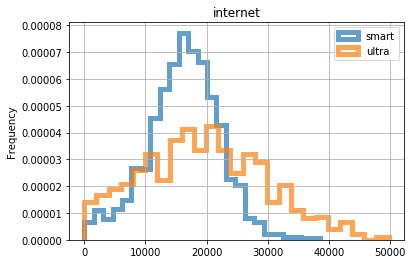

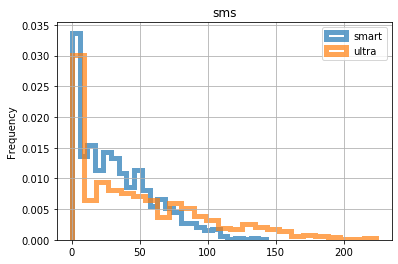

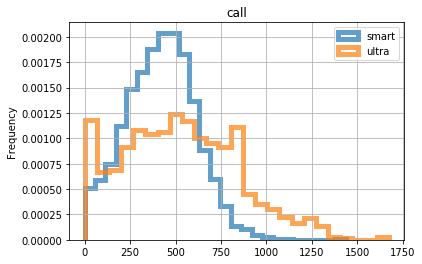

In [5]:
mean_for_user = calls_message_internet_group.pivot_table(index = 'tariff', 
                                                           values = ['mb_used', 'call_duration'],
                                                           aggfunc = ['describe'])
mean_for_user_1 = calls_message_internet_group.pivot_table(index = 'tariff', 
                                                           values = ['count_messages'],
                                                           aggfunc = ['describe'])
var_for_user = calls_message_internet_group.pivot_table(index = 'tariff', 
                                                           values = ['mb_used', 'count_messages', 'call_duration'],
                                                           aggfunc = ['var'])

display(mean_for_user.head())
display(mean_for_user_1.head())
display(var_for_user.head())


ax = calls_message_internet_group[calls_message_internet_group['tariff'] == 'smart'].plot(kind='hist', y='mb_used' , density = True, histtype='step', bins=25, linewidth=5, alpha=0.7, label='smart')
calls_message_internet_group[calls_message_internet_group['tariff'] == 'ultra'].plot(kind='hist', y='mb_used', histtype='step',
         bins=25, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True, title = 'internet', density = True)
plt.show()

ax = calls_message_internet_group[calls_message_internet_group['tariff'] == 'smart'].plot(kind='hist' , density = True, y='count_messages', histtype='step', bins=25, linewidth=5, alpha=0.7, label='smart')
calls_message_internet_group[calls_message_internet_group['tariff'] == 'ultra'].plot(kind='hist', y='count_messages', histtype='step',
         bins=25, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True, title = 'sms', density = True)
plt.show()

ax = calls_message_internet_group[calls_message_internet_group['tariff'] == 'smart'].plot(kind='hist',density = True, y='call_duration', histtype='step', bins=25, linewidth=5, alpha=0.7, label='smart')
calls_message_internet_group[calls_message_internet_group['tariff'] == 'ultra'].plot(kind='hist', y='call_duration', histtype='step',
         bins=25, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True, title = 'call', density = True)
plt.show()



    Все пользователи тарифа "Ultra" не используют минуты разговора, включенные в бесплантый пакет. При этом примерно половина из них лишь на 4% превышают лимит по тарифу "Smart". Большая часть пользователей тарифа "Smart" не платят за дополнительные минуты разговора, но 38% клиентов оператора все-таки делают это. 
    Что касается sms-сообщений, то пользователи тарифа "Ultra" также значительно не дотягивают до лимита бесплатных sms. Однако уже более 35% пользователей доплачивали бы за предоставление дополнительных sms-сообщений, будь они на тарифе "Smart". Клиенты тарифа "Smart" доплачивают за дополнительные sms, но не так много, как за минуты разговора (26%).
    Интернет-трафика не хватает всем, но больше все-таки представителям тарифа "Smart" (56% против 21% на "Ultra"). 
    В среденем в год пользователь тарифа "Ultra" переплачивает стоимость абонентсокй платы на 930 руб., в то время как пользователь тарифа "Smart" аж на 5000 руб.
    Все выводы сделаны на основе гистограмм и данных, полученных из метода describe().

## ШАГ 4.

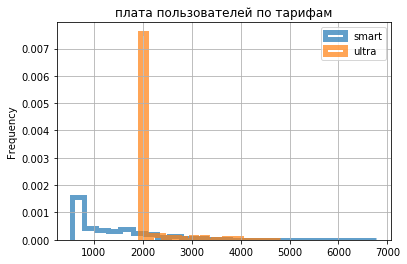

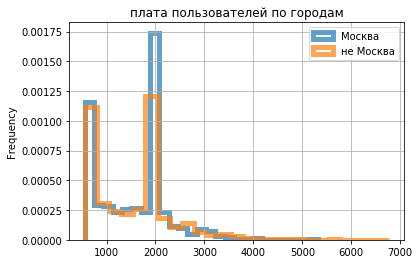

count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: rub_user, dtype: float64
count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: rub_user, dtype: float64
значение для проверки гипотезы о равенстве дисперсий выборок по тарифам 1.6855369377883898e-124
значение для проверки гипотезы о равенстве дисперсий выборок по городам 0.009373921759468934
p-значение: 2.7240946993530846e-246
Отвергаем нулевую гипотезу
p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


In [6]:
ax = calls_message_internet_group[calls_message_internet_group['tariff'] == 'smart'].plot(kind='hist', y='rub_user', histtype='step', bins=25, linewidth=5, alpha=0.7, label='smart', density = True)
calls_message_internet_group[calls_message_internet_group['tariff'] == 'ultra'].plot(kind='hist', y='rub_user', histtype='step',
         bins=25, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True, title = 'плата пользователей по тарифам', density = True)
plt.show()

ax = calls_message_internet_city_group[calls_message_internet_city_group['city'] == 'Москва'].plot(kind='hist', y='rub_user', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Москва', density = True)
calls_message_internet_city_group[calls_message_internet_city_group['city'] != 'Москва'].plot(kind='hist', y='rub_user', histtype='step',
         bins=25, linewidth=5, alpha=0.7, label='не Москва', ax=ax, grid=True, legend=True, title = 'плата пользователей по городам', density = True)
plt.show()

print(calls_message_internet_group[calls_message_internet_group['tariff'] == 'smart']['rub_user'].describe())
print(calls_message_internet_group[calls_message_internet_group['tariff'] == 'ultra']['rub_user'].describe())

type_tariff = calls_message_internet_group[['tariff', 'rub_user']]
type_city = calls_message_internet_city_group[['city', 'rub_user']]
smart = list(type_tariff[type_tariff['tariff'] == 'smart']['rub_user'])
ultra = list(type_tariff[type_tariff['tariff'] == 'ultra']['rub_user'])
moscow = list(type_city[type_city['city'] == 'Москва']['rub_user'])
other_city = list(type_city[type_city['city'] != 'Москва']['rub_user'])

stat, p = st.levene(smart, ultra)
print('значение для проверки гипотезы о равенстве дисперсий выборок по тарифам', p)

stat, p = st.levene(other_city, moscow)
print('значение для проверки гипотезы о равенстве дисперсий выборок по городам', p)

alpha = 0.05 

# расчет для сравнения выручки от пользовтелей тарифов "Smart" и "Ultra"
results = st.ttest_ind(ultra, smart, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    
# расчет для сравнения выручки от пользовтелей из Москвы и других городов    
    
results = st.ttest_ind(other_city, moscow, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

    Для проверки гипотез пороговое значение 'alpha' выбрано наиболее часто используемым и равно 0.05. В качестве критерия для проверки гипотез я использовал расчет распределения Стьюдента для значений ежемесячных выручек по каждому клиенту. Применял метод для проверки равенства средних двух генеральных совокупностей поскольку города и тарифы дают сильно отличающиеся дисперсии и средние значения. Поэтому и дисперсию в методе считал отдельно для каждой выборки (определил по тесту Левене, поскольку о нормальности предложенных выборок говорить не приходится. В итоге значения оказались <0.05). Альтернативная гипотеза H1 звучит так: 'Средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается'. За нулевую гипотезу H0 для сравнения тарифов взято предположение, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. Итогом стало определение неверности нулевой гипотезы, т.е. средняя выручка от пользователей тарифов «Ультра» и «Смарт» действительно различается. 
    Для сравнения выручки от пользователей из Москвы и других городов поступал аналогично.
    гипотеза H0: выручка от пользователей из Москвы и других городов не различается.
    гипотеза H1: выручка от пользователей из Москвы и других городов различается.
    Итогом стало принятие решения о принятии нулевой гипотезы H0, т.е. выручка пользователей из Москвы и других городов не различается.
 
    

## ШАГ 5.

В рамках проекта проведен анализ показателей тарифных планов оператора сотовой на выборке из 500 пользователей 2-х тарифных планов из разных городов России. Из таблиц удалены звонки длительностью 0 секунд, поскольку они не влияют на стоимость обслуживания клиентов, хотя таких записей было около 20%. Данные по продолжительности звонков и объему трафика округлены в большую сторону доцелых значений минукт и мегабайт. Составлена сводная таблица на основе данных 5 таблиц для более целостного представления данных и упрощения производимых расчетов требуемых показателей. По результатам расчетов составлены гистограммы и произведен исследовательский анализ данных оказания различных услуг связ для каждого пользователя по месяцам. Выявлены закономерности, которые говорят о переплате большинством клиентов тарифа "Smart" за услуги интернета и звонков сверх тарифного плана. В то же время пользователи тарифа ""Ultra" если и переплачивают, то только за объем предоставляемого интернет трафика.
Также проведен статистический анализ данных на основе сравнения выборок для разных тарифов и городов (Москва и все остальные).
В результате оценки показателей 2-х тарифных планов гипотеза о равенстве средней выручки от пользователей тарифов «Ультра» и «Смарт» не оправдалась. В свою очередь предположение о равенстве доходов компании с пользователей из Москвы и других регионов оправдала себя довольно существенно (значение критерия в 10 раз превосходит пороговое).
Предположительно, сравнивая статистические показатели и проводя анализ на основе распределения Стьюдента тариф "Ultra" оказывается лучше, я бы сказал перспективней для продвижения и рекламной кампании.